# **Chuẩn bị dữ liệu**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
# Unzip the archive
local_zip = '/content/drive/MyDrive/data/bear.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os
base_dir = '/content/bear'
# Change the base_dir to where you put dataset
print("Contents of base directory:")
print(os.listdir(base_dir))
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['polarbear', 'panda', 'brownbear']

Contents of validation directory:
['polarbear', 'panda', 'brownbear']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with training pictures
train_brownbear_dir = os.path.join(train_dir, 'brownbear')
train_panda_dir = os.path.join(train_dir, 'panda')
train_polarbear_dir = os.path.join(train_dir, 'polarbear')
# Directory with validation pictures
validation_brownbear_dir = os.path.join(validation_dir, 'brownbear')
validation_panda_dir = os.path.join(validation_dir, 'panda')
validation_polarbear_dir = os.path.join(validation_dir, 'polarbear')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of train directory:
['polarbear', 'panda', 'brownbear']

Contents of validation directory:
['polarbear', 'panda', 'brownbear']


In [ ]:
train_brownbear_fnames = os.listdir(train_brownbear_dir)
train_panda_fnames = os.listdir(train_panda_dir)
train_polarbear_fnames = os.listdir(train_polarbear_dir)

print(train_brownbear_fnames[:10])
print(train_panda_fnames[:10])
print(train_polarbear_fnames[:10])

print('total training brown bear images :', len(os.listdir(train_brownbear_dir)))
print('total training panda images :', len(os.listdir(train_panda_dir)))
print('total training polar bear images :', len(os.listdir(train_polarbear_dir)))

print('total validation brown bear images :', len(os.listdir(validation_brownbear_dir)))
print('total validation panda images :', len(os.listdir(validation_panda_dir)))
print('total validation polar bear images :', len(os.listdir(validation_polarbear_dir)))

['UDXEGX6QOSND.jpg', 'ALSJJQAXH12F.jpg', 'HX3NFG5G7AZI.jpg', '6L03M51PN6IA.jpg', 'WQ2OXLXI7PMS.jpg', 'CV5YS92ZO90O.jpg', 'YC0KHHNZ1URV.jpg', '5M5PNFDSKNDL.jpg', 'WX7MMGK3HUBN.jpg', 'RID3PF0C1LR4.jpg']
['panda_00095.jpg', 'panda_00958.jpg', 'panda_00656.jpg', 'panda_00598.jpg', 'panda_00180.jpg', 'panda_00583.jpg', 'panda_00154.jpg', 'panda_00566.jpg', 'panda_00784.jpg', 'panda_00025.jpg']
['1KIJDFKKCCST.jpg', '1CA1NDB58HMW.jpg', '8KYT7ZM6RA39.jpg', '4DS4DKQS33L9.jpg', 'R4CMZ0BF6P3N.jpg', 'YWWUSWODW76G.jpg', '7QIK0ZCL55WN.jpg', '490TFSVRPOXP.jpg', 'M1XKMUBKIRZK.jpg', 'Q01YK5EE84UG.jpg']
total training brown bear images : 1000
total training panda images : 1000
total training polar bear images : 1000
total validation brown bear images : 500
total validation panda images : 500
total validation polar bear images : 500


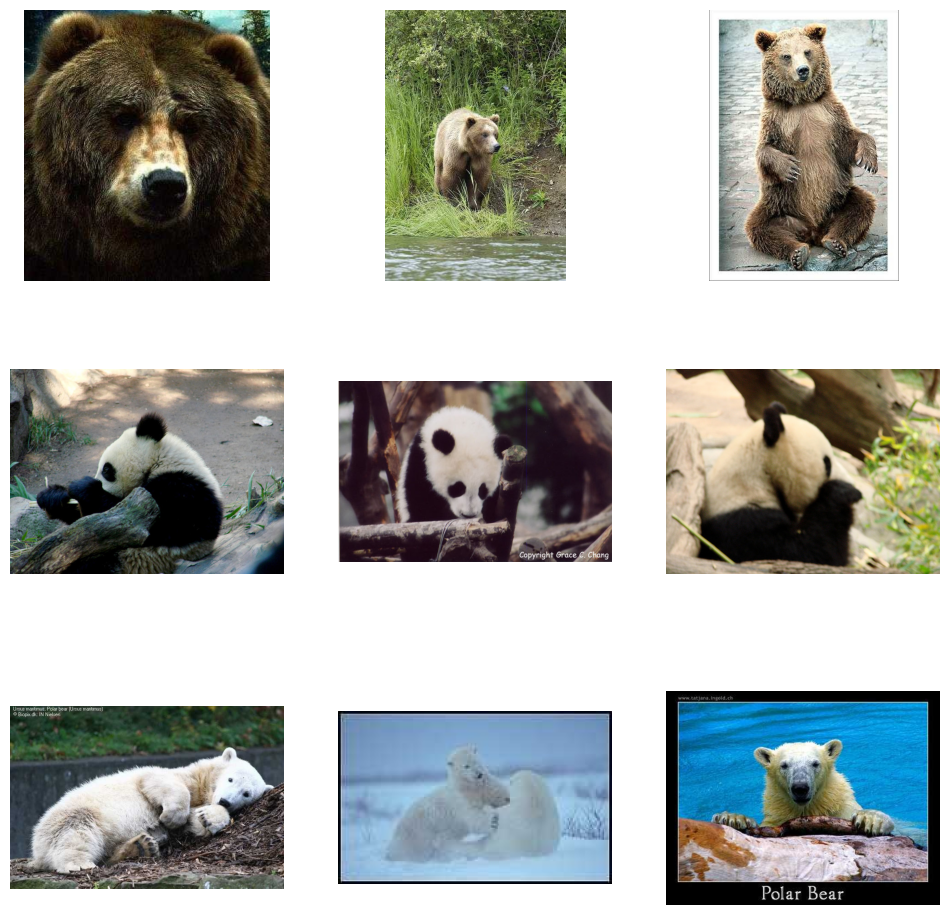

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 3
ncols = 3
pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_brownbear_pix = [os.path.join(train_brownbear_dir, fname)
  for fname in train_brownbear_fnames[ pic_index-3:pic_index]
  ]
next_panda_pix = [os.path.join(train_panda_dir, fname)
  for fname in train_panda_fnames[ pic_index-3:pic_index]
  ]
next_polarbear_pix = [os.path.join(train_polarbear_dir, fname)
  for fname in train_polarbear_fnames[ pic_index-3:pic_index]
  ]
for i, img_path in enumerate(next_brownbear_pix+next_panda_pix+next_polarbear_pix):
# Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# **Chuẩn hóa và biểu diễn phân bố dữ liệu**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.)
val_datagen = ImageDataGenerator(rescale=1.0/255.)

In [ ]:
import matplotlib.pyplot as plt

#training data
train_generator = train_datagen.flow_from_directory(
'/content/bear/train',
target_size=(64, 64), # Resizes images
batch_size=20,
class_mode='categorical')

#Testing data
validation_generator = val_datagen.flow_from_directory(
'/content/bear/validation',
target_size=(64, 64),
batch_size=20,
class_mode='categorical')

Found 3000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [ ]:
# Load dữ liệu train và test
X_train, y_train = [], []
for data_batch, labels_batch in train_generator:
    X_train.extend(data_batch)
    y_train.extend(labels_batch)
    if len(X_train) >= len(os.listdir(train_brownbear_dir)) + len(os.listdir(train_polarbear_dir)) + len(os.listdir(train_panda_dir)):
        break

X_val, y_val = [], []
for data_batch, labels_batch in validation_generator:
    X_val.extend(data_batch)
    y_val.extend(labels_batch)
    if len(X_val) >= len(os.listdir(validation_brownbear_dir)) + len(os.listdir(validation_polarbear_dir)) + len(os.listdir(validation_panda_dir)):
        break

In [ ]:
import numpy as np
# Chuyển đổi list thành numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(3000, 12288)
(1500, 12288)
(3000, 3)
(1500, 3)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

In [ ]:
print(X_train_pca.shape)
print(X_val_pca.shape)

(3000, 3)
(1500, 3)


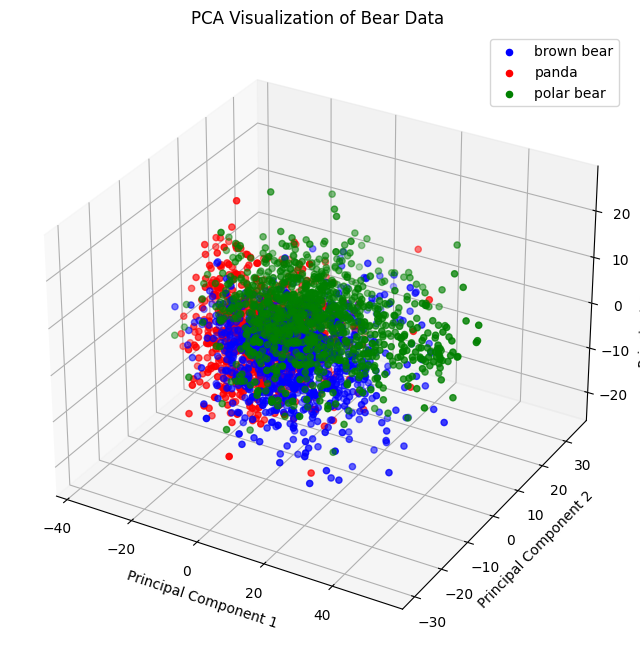

In [ ]:
# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_pca[y_train[:, 0] == 1, 0], X_train_pca[y_train[:, 0] == 1, 1], X_train_pca[y_train[:, 0] == 1, 2], c='b', label='brown bear')
ax.scatter(X_train_pca[y_train[:, 1] == 1, 0], X_train_pca[y_train[:, 1] == 1, 1], X_train_pca[y_train[:, 1] == 1, 2], c='r', label='panda')
ax.scatter(X_train_pca[y_train[:, 2] == 1, 0], X_train_pca[y_train[:, 2] == 1, 1], X_train_pca[y_train[:, 2] == 1, 2], c='g', label='polar bear')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Visualization of Bear Data')
ax.legend()
plt.show()


## **Giảm chiều dữ liệu và chạy mô hình phân loại**

In [ ]:
# Giảm chiều giữ lại 80% lượng thông tin
pca = PCA(n_components=0.8)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# In ra số chiều sau khi giảm
print("Số chiều sau khi giảm là:", pca.n_components_)

Số chiều sau khi giảm là: 144


Multinomial Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Multinomial Logistic Regression sử dụng dữ liệu gốc
logreg_original = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
logreg_original.fit(X_train, np.argmax(y_train, axis=1))

y_train_pred_original_logreg = logreg_original.predict(X_train)
accuracy_train_original_logreg = accuracy_score(np.argmax(y_train, axis=1), y_train_pred_original_logreg)
print("Accuracy on training data (Original Data):", accuracy_train_original_logreg)

y_val_pred_original = logreg_original.predict(X_val)
accuracy_original = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_original)
print("Accuracy on validation data (Original Data):", accuracy_original)

# Multinomial Logistic Regression model sử dụng dữ liệu đã giảm chiều
logreg_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
logreg_pca.fit(X_train_pca, np.argmax(y_train, axis=1))

y_train_pred_pca_logreg = logreg_pca.predict(X_train_pca)
accuracy_train_pca_logreg = accuracy_score(np.argmax(y_train, axis=1), y_train_pred_pca_logreg)
print("Accuracy on training data (PCA Data):", accuracy_train_pca_logreg)

y_val_pred_pca = logreg_pca.predict(X_val_pca)
accuracy_pca = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_pca)
print("Accuracy on validation data (PCA Data):", accuracy_pca)

Accuracy on training data (Original Data): 1.0
Accuracy on validation data (Original Data): 0.8186666666666667
Accuracy on training data (PCA Data): 0.7543333333333333
Accuracy on validation data (PCA Data): 0.7093333333333334


Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Gausian Naïve Bayes sử dụng dữ liệu gốc
nb_original = GaussianNB()
nb_original.fit(X_train, np.argmax(y_train, axis=1))

y_train_pred_nb_original = nb_original.predict(X_train)
accuracy_nb_train_original = accuracy_score(np.argmax(y_train, axis=1), y_train_pred_nb_original)
print("Accuracy on training data (Naïve Bayes - Original Data):", accuracy_nb_train_original)


y_val_pred_nb_original = nb_original.predict(X_val)
accuracy_nb_original = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_nb_original)
print("Accuracy on validation data (Naïve Bayes - Original Data):", accuracy_nb_original)

# Gaussian Naïve Bayes sử dụng dữ liệu đã giảm chiều
nb_pca = GaussianNB()
nb_pca.fit(X_train_pca, np.argmax(y_train, axis=1))

y_train_pred_nb_pca = nb_pca.predict(X_train_pca)
accuracy_nb_train_pca = accuracy_score(np.argmax(y_train, axis=1), y_train_pred_nb_pca)
print("Accuracy on training data (Naïve Bayes - PCA Data):", accuracy_nb_train_pca)

y_val_pred_nb_pca = nb_pca.predict(X_val_pca)
accuracy_nb_pca = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_nb_pca)
print("Accuracy on validation data (Naïve Bayes - PCA Data):", accuracy_nb_pca)

Accuracy on training data (Naïve Bayes - Original Data): 0.632
Accuracy on validation data (Naïve Bayes - Original Data): 0.6166666666666667
Accuracy on training data (Naïve Bayes - PCA Data): 0.6296666666666667
Accuracy on validation data (Naïve Bayes - PCA Data): 0.6446666666666667


## **So sánh**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate precision for each model
precision_logreg = precision_score(np.argmax(y_val, axis=1), y_val_pred_original, average='weighted')
precision_logreg_pca = precision_score(np.argmax(y_val, axis=1), y_val_pred_pca, average='weighted')
precision_nb_original = precision_score(np.argmax(y_val, axis=1), y_val_pred_nb_original, average='weighted')
precision_nb_pca = precision_score(np.argmax(y_val, axis=1), y_val_pred_nb_pca, average='weighted')

# Calculate recall for each model
recall_logreg = recall_score(np.argmax(y_val, axis=1), y_val_pred_original, average='weighted')
recall_logreg_pca = recall_score(np.argmax(y_val, axis=1), y_val_pred_pca, average='weighted')
recall_nb_original = recall_score(np.argmax(y_val, axis=1), y_val_pred_nb_original, average='weighted')
recall_nb_pca = recall_score(np.argmax(y_val, axis=1), y_val_pred_nb_pca, average='weighted')

# Calculate accuracy for each model
accuracy_original = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_original)
accuracy_pca = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_pca)
accuracy_nb_original = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_nb_original)
accuracy_nb_pca = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_nb_pca)

# Create DataFrame to store metrics
models = ["Multinomial LR (Original Data)",
          "Multinomial LR (PCA Data)",
          "Naïve Bayes (Original Data)",
          "Naïve Bayes (PCA Data)"]

accuracies = [accuracy_original, accuracy_pca, accuracy_nb_original, accuracy_nb_pca]

precisions = [precision_logreg, precision_logreg_pca, precision_nb_original, precision_nb_pca]
recalls = [recall_logreg, recall_logreg_pca, recall_nb_original, recall_nb_pca]

metrics_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls
})


# Print metrics
print(metrics_df)


                            Model  Accuracy  Precision    Recall
0  Multinomial LR (Original Data)  0.818667   0.828075  0.818667
1       Multinomial LR (PCA Data)  0.709333   0.710921  0.709333
2     Naïve Bayes (Original Data)  0.616667   0.627320  0.616667
3          Naïve Bayes (PCA Data)  0.644667   0.648572  0.644667


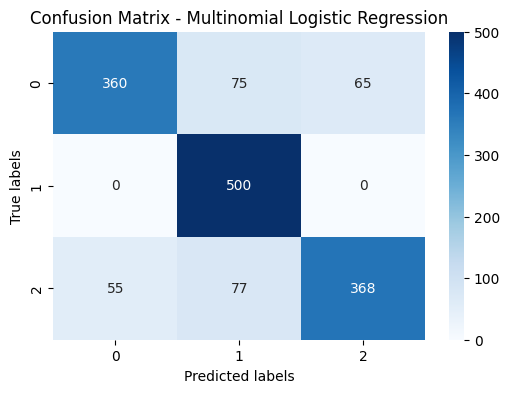

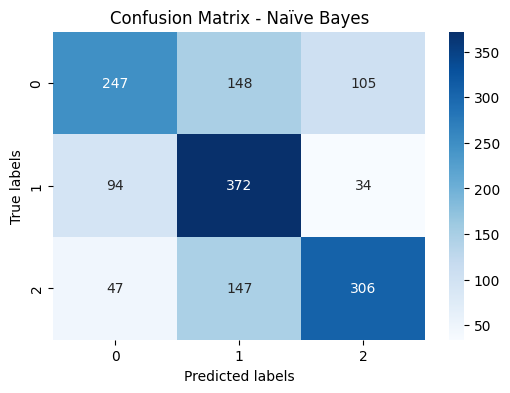

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Multinomial Logistic Regression
confusion_matrix_logreg = confusion_matrix(np.argmax(y_val, axis=1), y_val_pred_original)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_logreg, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Multinomial Logistic Regression')
plt.show()

print()

# Naïve Bayes
confusion_matrix_nb = confusion_matrix(np.argmax(y_val, axis=1), y_val_pred_nb_original)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_nb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naïve Bayes')
plt.show()